# SAMap

Comparing _P. crozieri_ and _C. gigas_ trochophore larvae.

Import libraries first:

In [1]:
import scanpy as sc

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
from samap.mapping import SAMAP
from samalg import SAM

In [3]:
base = "/Users/npapadop/Documents/teaching/2023/advanced_scRNAseq/data/samap_starter_pack/"

In [4]:
tmp = sc.read_h5ad(base + "prostheceraeus.h5ad")
pcro = SAM(tmp)
pcro.preprocess_data()
pcro.run()

tmp = sc.read_h5ad(base + "crassostrea.h5ad")
cgig = SAM(tmp)
cgig.preprocess_data()
cgig.run()

RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8947275752492091
Iteration: 2, Convergence: 0.010926808289885561
Computing the UMAP embedding...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Elapsed time: 30.635623931884766 seconds
RUNNING SAM
Iteration: 0, Convergence: 1.0
Iteration: 1, Convergence: 0.8683650678226681
Iteration: 2, Convergence: 0.01623670259085001
Computing the UMAP embedding...
Elapsed time: 18.993144035339355 seconds


In [13]:
sams = {"pcro": pcro, "cgig": cgig}
maps = "/Users/npapadop/Documents/teaching/2023/advanced_scRNAseq/data/samap_starter_pack/"

sm = SAMAP(sams, f_maps=maps)

20283 `pcro` gene symbols match between the datasets and the BLAST graph.
14468 `cgig` gene symbols match between the datasets and the BLAST graph.


In [22]:
sm.run(ncpus=6, N_GENE_CHUNKS=2)

Prepping datasets for translation.
Translating feature spaces pairwise.
Projecting data into joint latent space. 3.3438689708709717
Correcting data with means. 4.178674936294556
Expanding neighbourhoods of species pcro...
Expanding neighbourhoods of species cgig...
Indegree coarsening
0/1 (0, 17848)
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 1 complete.
Alignment scores:
          cgig      pcro
cgig  0.000000  0.548139
pcro  0.452854  0.000000
Calculating gene-gene correlations in the homology graph...
Prepping datasets for translation.
Translating feature spaces pairwise.
Projecting data into joint latent space. 2.551222085952759
Correcting data with means. 3.0145089626312256
Expanding neighbourhoods of species pcro...
Expanding neighbourhoods of species cgig...
Indegree coarsening
0/1 (0, 17848)
Rescaling edge weights by expression correlations.
Concatenating SAM objects...
Iteration 2 complete.
Alignment scores:
          cgig     pcro

<Axes: >

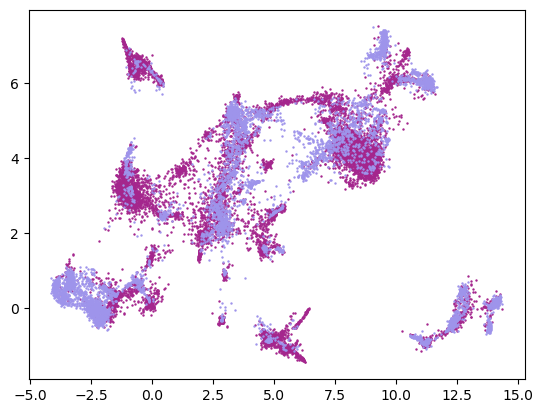

In [24]:
sm.scatter()

# Making sense of the data

In [47]:
from samap.analysis import get_mapping_scores

In [45]:
sm.sams["cgig"].adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito',
       'RNA_snn_res.7', 'seurat_clusters', 'merged_clusters', 'old.ident',
       'cluster_name', 'fine', 'coarse', 'leiden_clusters'],
      dtype='object')

In [48]:
keys = {'pcro': 'fine', 'cgig': 'fine'}
D, MappingTable = get_mapping_scores(sm, keys, n_top=0)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
pcro_rows = MappingTable.index.str.startswith("pcro")
cgig_cols = MappingTable.columns[MappingTable.columns.str.startswith("cgig")]
final_table = MappingTable[pcro_rows][cgig_cols]

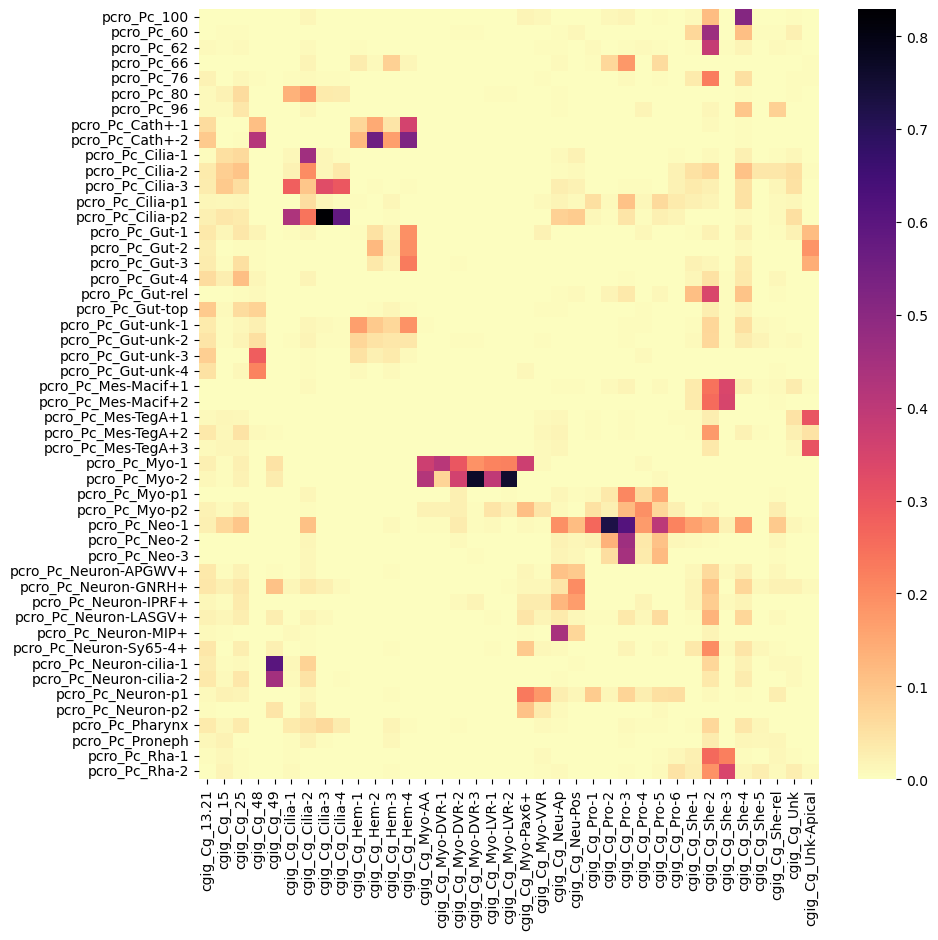

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(final_table, cmap="magma_r", ax=ax)
fig.savefig("test.pdf")

In [70]:
pcro = sc.read_h5ad(base + "prostheceraeus.h5ad")
sc.pp.normalize_per_cell(pcro)
sc.pp.log1p(pcro)

In [71]:
cgig = sc.read_h5ad(base + "crassostrea.h5ad")
sc.pp.normalize_per_cell(cgig)
sc.pp.log1p(cgig)

In [74]:
sc.tl.rank_genes_groups(pcro, groupby="fine", use_raw=False)
sc.tl.rank_genes_groups(cgig, groupby="fine", use_raw=False)

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:399

In [82]:
pcro_genes = pcro.uns["rank_genes_groups"]["names"]["Pc_100"][:50]

In [90]:
pcro_genes

array(['g19268', 'g37724', 'g139', 'g31669', 'g31668', 'g39560', 'g35198',
       'g13754', 'g13531', 'g21352', 'g37297', 'g6270', 'g36317',
       'g19867', 'g19866', 'g8767', 'g27131', 'g9885', 'g3867', 'g21369',
       'g35375', 'g38779', 'g3788', 'g30921', 'g24196', 'g17897',
       'g38527', 'g20696', 'g6084', 'g37298', 'g11094', 'g41017',
       'g25990', 'g29219', 'g38606', 'g23751', 'g40087', 'g20067',
       'g11308', 'g3911', 'g31281', 'g30399', 'g1655', 'g27066', 'g40403',
       'g16748', 'g9831', 'g17346', 'g8203', 'g23435'], dtype=object)

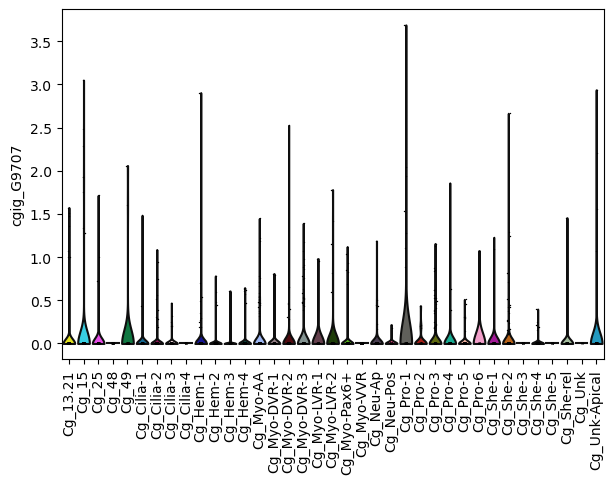

In [95]:
sc.pl.violin(cgig, keys=["cgig_G9707"], groupby="fine", rotation=90)

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


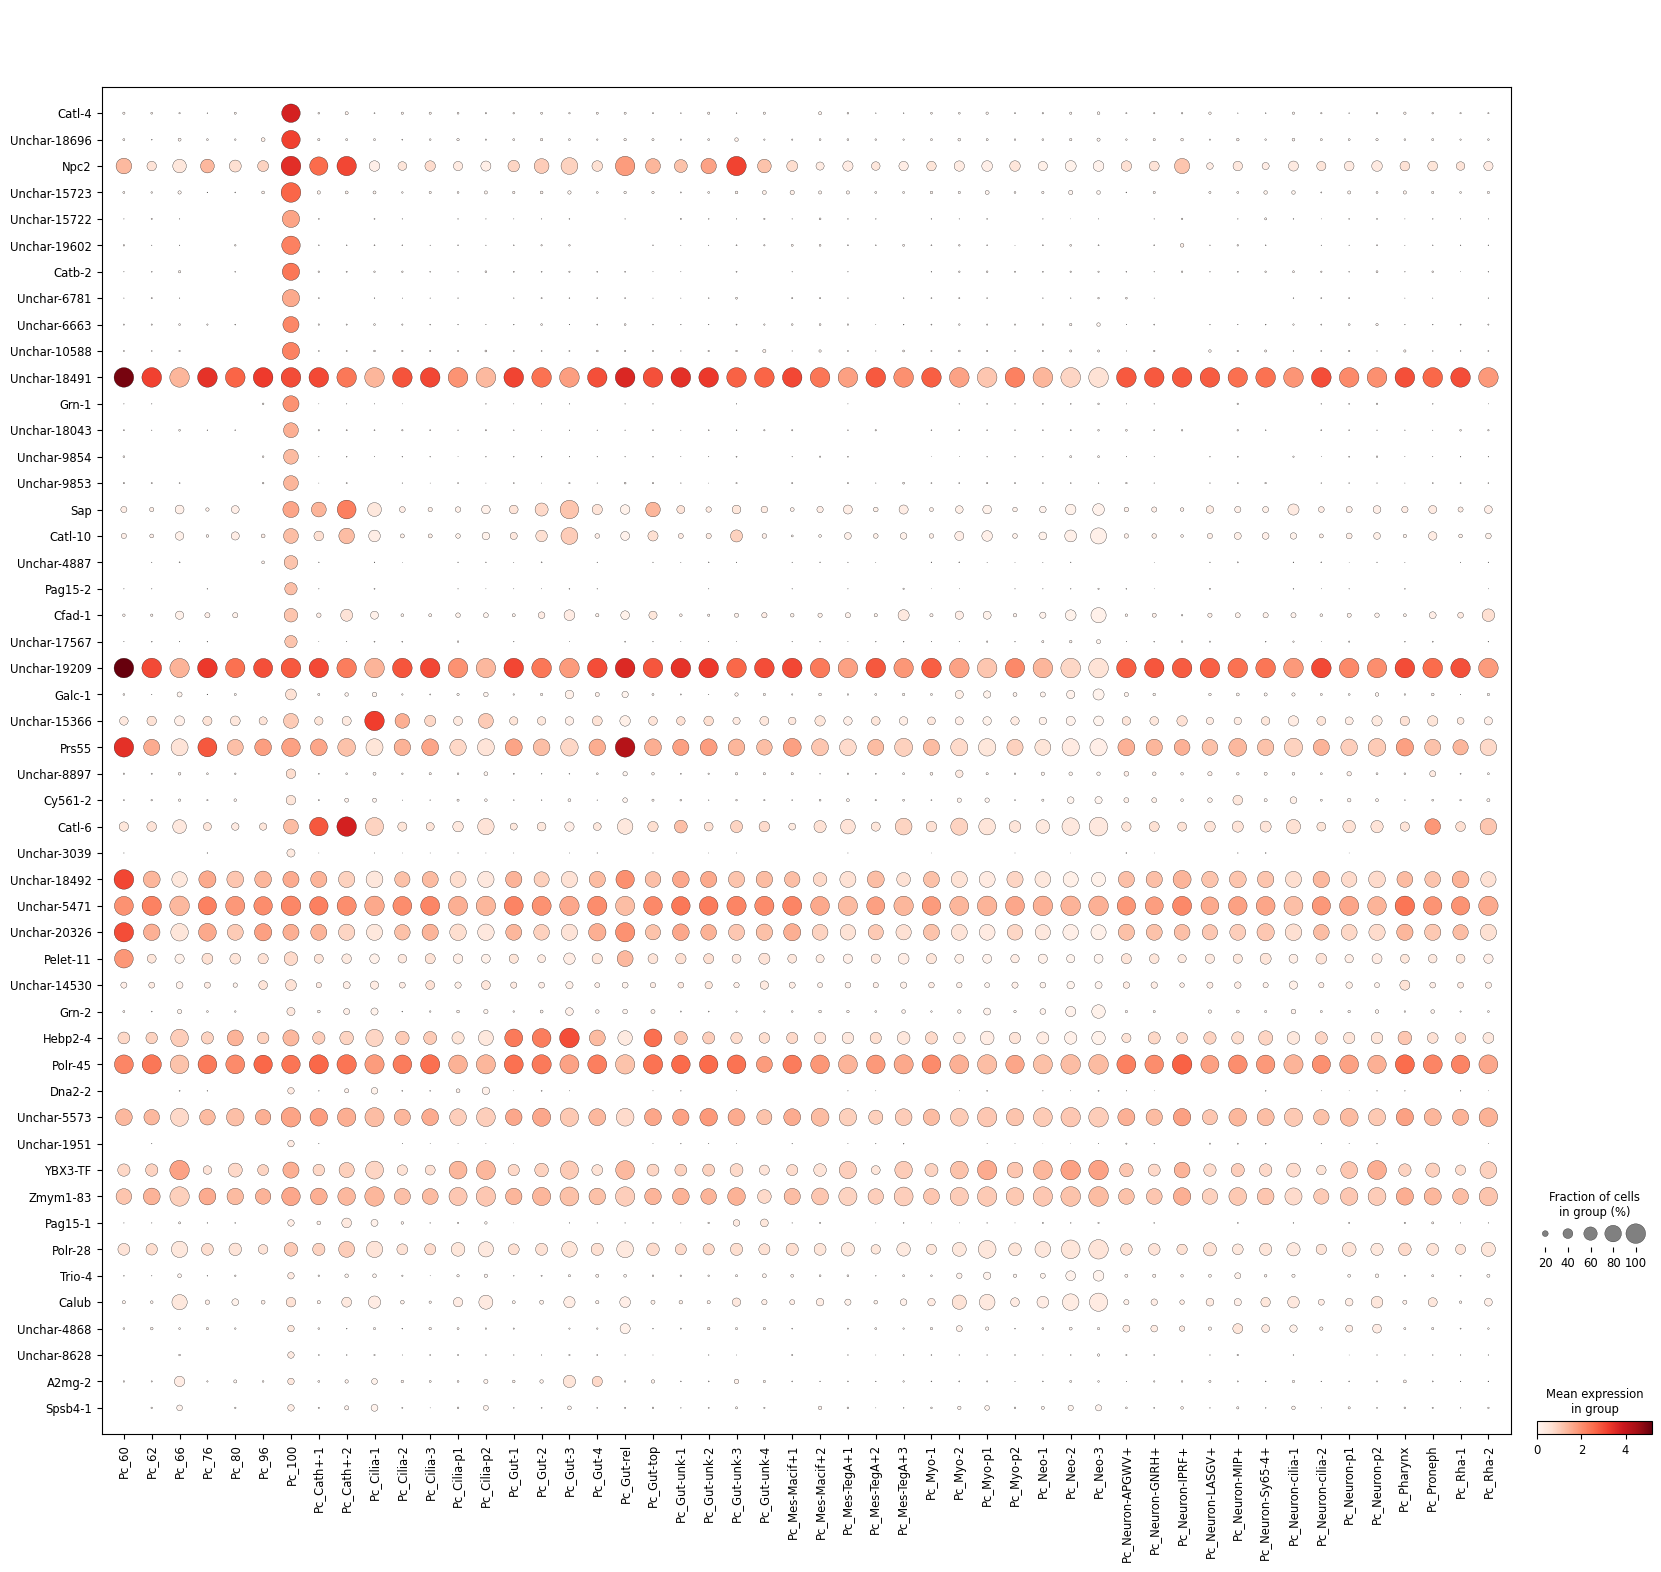

In [89]:
sc.pl.dotplot(pcro, pcro.var["features"].loc[pcro_genes], gene_symbols="features", groupby="fine", swap_axes=True, use_raw=False)